# [Контест](https://contest.yandex.ru/contest/29396/enter/)    
# Домашнее задание #7 "Сортировка событий"

# A. Закраска прямой

На числовой прямой окрасили N отрезков. Известны координаты левого и правого концов каждого отрезка ($L_i$ и $R_i$). Найти длину окрашенной части числовой прямой.

In [4]:
N = int(input())
events = []

for _ in range(N):
    start, end = map(int, input().split())
    events.append((start, -1))
    events.append((end, 1))
events.sort()

counter = 0
lenght = 0
for i in range(len(events)):
    if counter > 0:
        lenght += events[i][0] - events[i-1][0]
    if events[i][1] == -1:
        counter += 1
    elif events[i][1] == 1:
        counter -= 1
print(lenght)

2
10 20
20 40
30


# B. Таможня

Идёт 2163 год. Мишу, который работает в отделении таможни при космодроме города Нью-Питер, вызвал в кабинет шеф.

Как оказалось, недавно Министерство Налогов и Сборов выделило отделению определённую сумму денег на установку новых аппаратов для автоматического досмотра грузов. Естественно, средства были выделены с таким расчётом, чтобы грузы теперь находились на таможне ровно столько времени, сколько требуется непосредственно на их досмотр.

В руках шефа каким-то образом оказались сведения о надвигающейся ревизии – список из N грузов, которые будут контролироваться Министерством. Для каждого груза известны время его прибытия, отсчитываемое с некоторого момента, хранимого в большом секрете, и время, требуемое аппарату для обработки этого груза. Шеф дал Мише задание по этим данным определить, какое минимальное количество аппаратов необходимо заказать на заводе, чтобы все грузы Министерства начинали досматриваться сразу после прибытия. Необходимо учесть, что конструкция тех аппаратов, которые было решено установить, не позволяет обрабатывать два груза одновременно на одном аппарате. Напишите программу, которая поможет Мише справиться с его задачей.

In [6]:
# По факту вопрос задачи о том, какое максимальное количество 
# груза одновременно находится на таможне
# В cargo добавляем время прибытия и время отправления (время прибытия + время обработки)
N = int(input())
cargo = []
for _ in range(N):
    arrive, time_stay = map(int, input().split())
    departure = arrive + time_stay
    cargo.append((arrive, 1))
    cargo.append((departure, -1))
cargo.sort()

count = 0
max_count = 0
for i in range(len(cargo)):
    if cargo[i][1] == 1:
        count+=1
        max_count = max(count, max_count)
    if cargo[i][1] == -1:
        count-=1
print(max_count)    

5
13 4
15 1
11 5
12 3
10 3
3


# C. Минимальное покрытие

На прямой задано некоторое множество отрезков с целочисленными координатами концов [$L_i$, $R_i$]. Выберите среди данного множества подмножество отрезков, целиком покрывающее отрезок [0, M], (M — натуральное число), содержащее наименьшее число отрезков.

In [81]:
M = int(input())
events = []

# Записываем только отрезки, которые могут нам подойти
# (которые какой-то ненулевой частью попадают на заданный отрезок [0,M])

start, end = map(int, input().split())
while start != 0 or end != 0:
    if start < M and end > 0:
        events.append((start, end))
    start, end = map(int, input().split())

events.sort()
# На первый шаг надо выбрать отрезок, содержащий 0 и уходящий
# как можно дальше в положительную ось 0Х.
# В процессе движения по этому отрезку(включая его конец)
# искать такой отрезок, начинающийся на нём, который уйдёт
# тоже как можно дальше.

answer = []

current_interval = 0,0
next_interval = 0,0
for i in range(len(events)):
    if events[i][0] > current_interval[1]: # Выходим за границу текущего отрезка
        current_interval = next_interval
        answer.append(current_interval)
    if events[i][0] <= current_interval[1] and (events[i][1] > next_interval[1]): # Находим более длинный вариант
        next_interval = events[i]

# Если нужный элемент был последним
if len(answer)==0 or answer[-1][1] < M:
    answer.append(next_interval)

if  next_interval[1] < M:
    print('No solution')
else:
    print(len(answer))
    for val in answer:
        print(*val)

1
-1 0
0 1
0 0
1
0 1


# D. Наполненность котятами

На прямой в точках 
$a_1$, $a_2$, …, $a_n$
 (возможно, совпадающих) сидят 
n
 котят. На той же прямой лежат 
m
 отрезков [$l_1$, $r_1$],[$l_2,r_2$],…,[$l_m,r_m$]. Нужно для каждого отрезка узнать его наполненность котятами — сколько котят сидит на отрезке.

In [34]:
n, m = map(int, input().split()) # n - общее число котят, m - количество отрезков
cats = list(map(int, input().split()))
intervals = []

for i in range(m):
    interval_start, interval_end = map(int, input().split())
    intervals.append((interval_start, -1, i)) # первый индекс - координата начала/конца интервала
    intervals.append((interval_end, 1, i)) # второй индекс - тип интервала, третий индекс - номер интервала
    
for cat in cats:
    intervals.append((cat, 0))
intervals.sort()

# Идея: при проходе по циклу каждый раз при встрече котенка увеличивать cat_counter. 
# При встрече начала отрезка устанавливать соответсвующий ему элемент в ответе в значение cat_counter.
# При встрече конца отрезка меняеть элемент на cat_counter - "предыдущее значение элемента"
# По итогу туда будет записана разница количества котят на отрезках [0, stop] - [0, start] = [start, stop]
# которая является числом котят на этом отрезке
answer = [0 for _ in range(m)]
cat_counter = 0

for event in intervals:
    if event[1] == -1:
        answer[event[2]] = cat_counter
    elif event[1] == 1:
        answer[event[2]] = cat_counter - answer[event[2]]
    elif event[1] == 0:
        cat_counter+=1
for answer_i in answer:
    print(answer_i)

2 2
1 3 
0 2
1 4
1
2


# E. Полярные прямоугольники

Вася недавно изучил полярную систему координат. А именно, он изучил понятие полярного прямоугольника. Пусть задана стандартная декартова плоскость. Если на ней нарисовать две окружности с центром в начале координат, то область, находящаяся между ними, называется кольцом (на рисунке обозначена синим). Если на ней нарисовать два луча, то область, заметаемая первым лучом при движении ко второму, называется углом (т.е. область между этими двумя лучами, на рисунке обозначена зеленым). Полярным прямоугольником называется пересечение некоторого угла с некоторым кольцом (на рисунке обозначено красным).
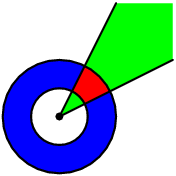
Задано несколько полярных прямоугольников. Найдите площадь их пересечения. Помните, что пересечение полярных прямоугольников может состоять из нескольких частей!

In [58]:
# Сортировка событий на кольце
events = []
N = int(input())
for i in range(N):
    r_1, r_2, fi_1, fi_2 = map(float, input().split())
    events.append((fi_1, 1, i, r_1, r_2))
    events.append((fi_2, -1, i, r_1, r_2))
events.sort()

# Можно сразу рассчитать высоту пересечения прямоугольников:
difference_of_squeres = min([row[4] for row in events])**2 - max([row[3] for row in events])**2
# Делаем за 2 прохода: на 1 выясняем количество открытых прямоугольников в угле=0
# на втором считаем площадь пересечения

open_close = [0]*N
# Первый проход
for event in events:
    if event[1] == 1:
        open_close[event[2]] = 1
    if event[1] == -1:
        open_close[event[2]] = 0
open_at_start = sum(open_close)

# Второй проход
counter = open_at_start
area = 0
pi = 3.14159265
for i in range(len(events)):
    if counter == N:
        if i == 0:
            area += (2*pi - events[i-1][0] + events[i][0]) * difference_of_squeres/2
        else:
            area += (abs(events[i][0] - events[i-1][0])) * difference_of_squeres/2
            # Площадь сектора кольца: S = delta_fi * (r_2**2 - r_1**2)/2
    if events[i][1] == 1:
        counter+=1
    if events[i][1] == -1:
        counter-=1
print(max(0, area))

2
84.68891 87.08898 0.76315 0.42392
40.00562 88.88346 2.39411 0.42392
241.47233340653503
